In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

old_df = pd.read_csv("Credit Card Dataset.csv")
old_df

,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
0,19,4.96,1/1/2019 0:12,grocery_pos,965721.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,2,82475,Platinum,Success
1,1009,4.96,1/1/2019 12:44,food_dining,413052.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,32555,Platinum,Success
2,2426,4.96,2/1/2019 0:25,gas_transport,584822.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,10173,Platinum,Success
3,2851,4.96,2/1/2019 12:01,misc_pos,980146.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,12342,Platinum,Success
4,3958,4.96,3/1/2019 10:54,misc_net,1926072.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,3,17157,Platinum,Failed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,105392,2.13,2/3/2019 13:12,misc_pos,334683.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,2,80990,Signature,Success
153,106083,2.13,2/3/2019 18:13,shopping_net,454570.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,3,42831,Signature,Success
154,106493,2.13,2/3/2019 21:15,kids_pets,454519.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,1,27506,Signature,Success
155,106857,2.13,2/3/2019 23:59,kids_pets,358047.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,2,84565,Signature,Success


In [2]:
old_df.describe()

,Transaction Number,Customer ID,Amount Transacted,Credit Limit,No of Transactions,Amounts received per day
count,157.000000,157.000000,1.540000e+02,156.000000,157.000000,157.000000
mean,65529.292994,4.712102,5.434962e+05,814423.076923,1.719745,59053.515924
std,96046.676020,1.514083,2.736553e+05,202644.581232,0.807294,67690.002232
min,19.000000,1.800000,1.056900e+05,400000.000000,1.000000,0.000000
25%,12867.000000,3.720000,3.341860e+05,700000.000000,1.000000,32555.000000
50%,29421.000000,4.960000,4.905690e+05,900000.000000,2.000000,53510.000000
75%,66406.000000,6.040000,7.289578e+05,1000000.000000,2.000000,77585.000000
max,439223.000000,6.590000,1.926072e+06,1000000.000000,5.000000,832630.000000


In [3]:
old_df.isnull().any()

Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted             True
First                        False
Last                         False
Gender                       False
Street                        True
City                         False
Credit Limit                  True
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

In [4]:
old_df.isnull().sum() #checking number of null values per column

Transaction Number           0
Customer ID                  0
Time stamp                   0
Category                     0
Amount Transacted            3
First                        0
Last                         0
Gender                       0
Street                       7
City                         0
Credit Limit                 1
No of Transactions           0
Amounts received per day     0
Card Type                    0
Authentication               0
dtype: int64

In [5]:
old_df.columns[old_df.isnull().any()] #checking specific columns with null values


Index(['Amount Transacted', 'Street', 'Credit Limit'], dtype='object')

In [6]:
nan_rows  = old_df.loc[old_df.isna().any(axis=1)] #locating all rows of data with null values
nan_rows

,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
32,85218,6.59,20/02/2019 22:05,misc_net,326162.0,Amanda,Molina,F,NaN,Philadelphia,1000000.0,1,0,Platinum,Success
33,90210,6.59,20/02/2019 22:10,misc_net,390534.0,Amanda,Molina,F,NaN,Philadelphia,1000000.0,2,0,Platinum,Success
34,40230,6.59,20/02/2019 22:18,misc_net,204850.0,Amanda,Molina,F,NaN,Philadelphia,1000000.0,3,0,Platinum,Success
35,77770,6.59,20/02/2019 22:31,misc_net,331349.0,Amanda,Molina,F,NaN,Philadelphia,1000000.0,4,0,Platinum,Success
36,22045,6.59,20/02/2019 22:51,misc_net,515263.0,Amanda,Molina,F,NaN,Philadelphia,NaN,5,0,Platinum,Success
43,23536,2.23,14/01/2019 19:17,entertainment,NaN,Thomas,Hale,M,949 Smith Parkway,Cazenovia,700000.0,1,66024,Gold,Success
54,29421,6.04,5/2/2019 7:25,misc_pos,688577.0,Bradley,Martinez,M,NaN,Cape Town,900000.0,1,83263,Platinum,Success
55,54021,6.04,5/2/2019 8:25,misc_pos,390534.0,Bradley,Martinez,M,NaN,Cape Towm,900000.0,2,0,Platinum,Success
143,196817,3.86,11/4/2019 18:11,home,NaN,Jacqueline,Curry,F,3047 Jeff Place,Marathon,900000.0,3,97438,Platinum,Success
148,203323,3.86,14/04/2019 13:19,food_dining,NaN,Jacqueline,Curry,F,3047 Jeff Place,Marathon,900000.0,2,99070,Platinum,Success


In [7]:
#locating customer ID's with null values
customer_ID_nan = nan_rows['Customer ID'].unique() 
print(customer_ID_nan)

[6.59 2.23 6.04 3.86]


In [9]:
#updating missing values


First = nan_rows['First'].unique() #calling first names to use them in the next analysis
print(First)
print (customer_ID_nan)
print (First[0])
#id = [i for i in range (len(customer_ID))]
#id
id = [i for i in range (len(customer_ID_nan))] #GENERATING indexes

print (id)


id_values = [  id, customer_ID_nan, First] 
id_tables = pd.DataFrame(id_values) 
id_tables


['Amanda' 'Thomas' 'Bradley' 'Jacqueline']
[6.59 2.23 6.04 3.86]
Amanda
[0, 1, 2, 3]


,0,1,2,3
0,0,1,2,3
1,6.59,2.23,6.04,3.86
2,Amanda,Thomas,Bradley,Jacqueline


In [11]:
#insert customer ID 4.96 in a data frame
Amanda = old_df.loc[(customer_ID_nan[0]) == old_df ['Customer ID']]
Amanda

,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
16,51250,6.59,30/01/2019 23:16,kids_pets,297820.0,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,2,42187,Platinum,Success
17,51528,6.59,31/01/2019 05:41,grocery_net,687879.0,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,3,98637,Platinum,Success
18,53779,6.59,1/2/2019 20:58,personal_care,738456.0,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,1,21304,Platinum,Success
19,56675,6.59,3/2/2019 15:56,shopping_net,378535.0,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,1,73556,Platinum,Success
20,59880,6.59,4/2/2019 23:48,shopping_pos,334116.0,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,2,36610,Platinum,Success
21,61639,6.59,5/2/2019 19:02,home,772360.0,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,1,80962,Platinum,Success
22,70418,6.59,11/2/2019 11:08,misc_net,580796.0,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,1,46701,Platinum,Success
23,71568,6.59,11/2/2019 20:56,shopping_pos,855465.0,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,1,66856,Platinum,Success
24,77745,6.59,15/02/2019 19:25,food_dining,978989.0,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,3,33911,Platinum,Success
25,79300,6.59,16/02/2019 21:09,health_fitness,451874.0,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,1,62217,Platinum,Success


In [12]:
#Street and Credit Limit have missing values
Amanda.isnull().any() 

Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted            False
First                        False
Last                         False
Gender                       False
Street                        True
City                         False
Credit Limit                  True
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

In [13]:
Amanda['Street']

16    8425 Daniel Knolls Suite 288
17    8425 Daniel Knolls Suite 288
18    8425 Daniel Knolls Suite 288
19    8425 Daniel Knolls Suite 288
20    8425 Daniel Knolls Suite 288
21    8425 Daniel Knolls Suite 288
22    8425 Daniel Knolls Suite 288
23    8425 Daniel Knolls Suite 288
24    8425 Daniel Knolls Suite 288
25    8425 Daniel Knolls Suite 288
26    8425 Daniel Knolls Suite 288
27    8425 Daniel Knolls Suite 288
28    8425 Daniel Knolls Suite 288
29    8425 Daniel Knolls Suite 288
30    8425 Daniel Knolls Suite 288
31    8425 Daniel Knolls Suite 288
32                             NaN
33                             NaN
34                             NaN
35                             NaN
36                             NaN
Name: Street, dtype: object

In [14]:
Amanda['Street'].mode()

0    8425 Daniel Knolls Suite 288
dtype: object

In [15]:
#filling NUll Values of Street

Amanda['Street'] = Amanda['Street'].fillna(Amanda['Street'].mode())
Amanda['Street']
#this method doesn't replace the null values

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


16    8425 Daniel Knolls Suite 288
17    8425 Daniel Knolls Suite 288
18    8425 Daniel Knolls Suite 288
19    8425 Daniel Knolls Suite 288
20    8425 Daniel Knolls Suite 288
21    8425 Daniel Knolls Suite 288
22    8425 Daniel Knolls Suite 288
23    8425 Daniel Knolls Suite 288
24    8425 Daniel Knolls Suite 288
25    8425 Daniel Knolls Suite 288
26    8425 Daniel Knolls Suite 288
27    8425 Daniel Knolls Suite 288
28    8425 Daniel Knolls Suite 288
29    8425 Daniel Knolls Suite 288
30    8425 Daniel Knolls Suite 288
31    8425 Daniel Knolls Suite 288
32                             NaN
33                             NaN
34                             NaN
35                             NaN
36                             NaN
Name: Street, dtype: object

In [16]:
#since method one has failed, we replace manually
Amanda['Street'] = Amanda['Street'].replace({np.nan: '8425 Daniel Knolls Suite 288'}) 
Amanda['Street']

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


16    8425 Daniel Knolls Suite 288
17    8425 Daniel Knolls Suite 288
18    8425 Daniel Knolls Suite 288
19    8425 Daniel Knolls Suite 288
20    8425 Daniel Knolls Suite 288
21    8425 Daniel Knolls Suite 288
22    8425 Daniel Knolls Suite 288
23    8425 Daniel Knolls Suite 288
24    8425 Daniel Knolls Suite 288
25    8425 Daniel Knolls Suite 288
26    8425 Daniel Knolls Suite 288
27    8425 Daniel Knolls Suite 288
28    8425 Daniel Knolls Suite 288
29    8425 Daniel Knolls Suite 288
30    8425 Daniel Knolls Suite 288
31    8425 Daniel Knolls Suite 288
32    8425 Daniel Knolls Suite 288
33    8425 Daniel Knolls Suite 288
34    8425 Daniel Knolls Suite 288
35    8425 Daniel Knolls Suite 288
36    8425 Daniel Knolls Suite 288
Name: Street, dtype: object

In [17]:
Amanda['Credit Limit']

16    1000000.0
17    1000000.0
18    1000000.0
19    1000000.0
20    1000000.0
21    1000000.0
22    1000000.0
23    1000000.0
24    1000000.0
25    1000000.0
26    1000000.0
27    1000000.0
28    1000000.0
29    1000000.0
30    1000000.0
31    1000000.0
32    1000000.0
33    1000000.0
34    1000000.0
35    1000000.0
36          NaN
Name: Credit Limit, dtype: float64

In [18]:
#checking mode
Amanda['Credit Limit'].mean() 


1000000.0

In [19]:
#Replacing teh missing variable with the mean 
Amanda['Credit Limit'] = Amanda['Credit Limit'].fillna(Amanda['Credit Limit'].mean())
Amanda['Credit Limit']

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


16    1000000.0
17    1000000.0
18    1000000.0
19    1000000.0
20    1000000.0
21    1000000.0
22    1000000.0
23    1000000.0
24    1000000.0
25    1000000.0
26    1000000.0
27    1000000.0
28    1000000.0
29    1000000.0
30    1000000.0
31    1000000.0
32    1000000.0
33    1000000.0
34    1000000.0
35    1000000.0
36    1000000.0
Name: Credit Limit, dtype: float64

In [20]:
#confirming no missing values left in Data Frame Amanda
Amanda.isnull().any() 


Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted            False
First                        False
Last                         False
Gender                       False
Street                       False
City                         False
Credit Limit                 False
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

In [22]:
#loading data for customer ID (index 1)
Thomas = old_df.loc[(customer_ID_nan[1])== old_df['Customer ID']] 
Thomas

,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
37,19277,2.23,12/1/2019 18:03,home,563751.0,Thomas,Hale,M,949 Smith Parkway,Cazenovia,700000.0,1,22770,Gold,Success
38,20013,2.23,13/01/2019 04:41,gas_transport,161930.0,Thomas,Hale,M,949 Smith Parkway,Cazenovia,700000.0,2,86409,Gold,Success
39,21708,2.23,14/01/2019 00:05,grocery_net,352806.0,Thomas,Hale,M,949 Smith Parkway,Cazenovia,700000.0,3,44060,Gold,Success
40,22174,2.23,14/01/2019 05:50,grocery_net,207755.0,Thomas,Hale,M,949 Smith Parkway,Cazenovia,700000.0,1,95466,Gold,Success
41,22386,2.23,14/01/2019 08:35,misc_pos,489540.0,Thomas,Hale,M,949 Smith Parkway,Cazenovia,700000.0,1,25557,Gold,Success
42,22846,2.23,14/01/2019 13:49,kids_pets,274395.0,Thomas,Hale,M,949 Smith Parkway,Cazenovia,700000.0,1,33735,Gold,Success
43,23536,2.23,14/01/2019 19:17,entertainment,NaN,Thomas,Hale,M,949 Smith Parkway,Cazenovia,700000.0,1,66024,Gold,Success
44,23633,2.23,14/01/2019 20:05,home,105690.0,Thomas,Hale,M,949 Smith Parkway,Cazenovia,700000.0,2,40135,Gold,Success
45,23667,2.23,14/01/2019 20:17,health_fitness,694888.0,Thomas,Hale,M,949 Smith Parkway,Cazenovia,700000.0,1,67884,Gold,Success


In [23]:
#amount trandacted has null values in DataSet Thomas
Thomas.isnull().any()

Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted             True
First                        False
Last                         False
Gender                       False
Street                       False
City                         False
Credit Limit                 False
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

In [24]:
Thomas ['Amount Transacted']

37    563751.0
38    161930.0
39    352806.0
40    207755.0
41    489540.0
42    274395.0
43         NaN
44    105690.0
45    694888.0
Name: Amount Transacted, dtype: float64

In [25]:
Thomas ['Amount Transacted'] = Thomas ['Amount Transacted'].fillna(Thomas ['Amount Transacted'].mean())
Thomas ['Amount Transacted'] 

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


37    563751.000
38    161930.000
39    352806.000
40    207755.000
41    489540.000
42    274395.000
43    356344.375
44    105690.000
45    694888.000
Name: Amount Transacted, dtype: float64

In [26]:
Thomas.isnull().any() #we have treated the missing value in Data Frame Thomas

Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted            False
First                        False
Last                         False
Gender                       False
Street                       False
City                         False
Credit Limit                 False
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

In [27]:
Bradley = old_df.loc[(customer_ID_nan[2])== old_df['Customer ID']]
Bradley

,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
51,586,6.04,1/1/2019 7:36,grocery_pos,640653.0,Bradley,Martinez,M,3426 David Divide Suite 717,Burns Flat,900000.0,3,89201,Platinum,Success
52,5240,6.04,4/1/2019 10:07,grocery_pos,745493.0,Bradley,Martinez,M,3426 David Divide Suite 717,Burns Flat,900000.0,2,31362,Platinum,Success
53,5886,6.04,4/1/2019 19:25,home,868021.0,Bradley,Martinez,M,3426 David Divide Suite 717,Burns Flat,900000.0,3,31436,Platinum,Success
54,29421,6.04,5/2/2019 7:25,misc_pos,688577.0,Bradley,Martinez,M,NaN,Cape Town,900000.0,1,83263,Platinum,Success
55,54021,6.04,5/2/2019 8:25,misc_pos,390534.0,Bradley,Martinez,M,NaN,Cape Towm,900000.0,2,0,Platinum,Success
56,11817,6.04,7/1/2019 21:33,personal_care,284923.0,Bradley,Martinez,M,3426 David Divide Suite 717,Burns Flat,900000.0,1,55134,Platinum,Success
57,12867,6.04,8/1/2019 10:02,shopping_net,814422.0,Bradley,Martinez,M,3426 David Divide Suite 717,Burns Flat,900000.0,1,73503,Platinum,Success
58,15007,6.04,9/1/2019 14:31,health_fitness,599741.0,Bradley,Martinez,M,3426 David Divide Suite 717,Burns Flat,900000.0,1,57402,Platinum,Success
59,16977,6.04,11/1/2019 3:10,grocery_pos,804560.0,Bradley,Martinez,M,3426 David Divide Suite 717,Burns Flat,900000.0,1,40230,Platinum,Success


In [29]:
#Bradley has  missing values
Bradley.isnull().any()

Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted            False
First                        False
Last                         False
Gender                       False
Street                        True
City                         False
Credit Limit                 False
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

In [30]:
Bradley['Street']

51    3426 David Divide Suite 717
52    3426 David Divide Suite 717
53    3426 David Divide Suite 717
54                            NaN
55                            NaN
56    3426 David Divide Suite 717
57    3426 David Divide Suite 717
58    3426 David Divide Suite 717
59    3426 David Divide Suite 717
Name: Street, dtype: object

In [31]:
Bradley['Street'] = Bradley['Street'].replace({np.nan: '3426 David Divide Suite 717'})
Bradley['Street']

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


51    3426 David Divide Suite 717
52    3426 David Divide Suite 717
53    3426 David Divide Suite 717
54    3426 David Divide Suite 717
55    3426 David Divide Suite 717
56    3426 David Divide Suite 717
57    3426 David Divide Suite 717
58    3426 David Divide Suite 717
59    3426 David Divide Suite 717
Name: Street, dtype: object

In [33]:
#Checking if missing values in Bradley are treated
Bradley.isnull().any()

Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted            False
First                        False
Last                         False
Gender                       False
Street                       False
City                         False
Credit Limit                 False
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

In [34]:
Jacqueline = old_df.loc[(customer_ID_nan[3])== old_df['Customer ID']]
Jacqueline

,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
138,191696,3.86,8/4/2019 19:54,misc_pos,389097.0,Jacqueline,Curry,F,3047 Jeff Place,Marathon,900000.0,1,49884,Platinum,Success
139,192429,3.86,9/4/2019 1:15,gas_transport,880778.0,Jacqueline,Curry,F,3047 Jeff Place,Marathon,900000.0,2,75261,Platinum,Success
140,193412,3.86,9/4/2019 18:31,personal_care,327971.0,Jacqueline,Curry,F,3047 Jeff Place,Marathon,900000.0,2,49454,Platinum,Success
141,194452,3.86,10/4/2019 11:29,grocery_pos,689201.0,Jacqueline,Curry,F,3047 Jeff Place,Marathon,900000.0,1,99675,Platinum,Success
142,196303,3.86,11/4/2019 12:33,personal_care,792440.0,Jacqueline,Curry,F,3047 Jeff Place,Marathon,900000.0,2,24557,Platinum,Success
143,196817,3.86,11/4/2019 18:11,home,NaN,Jacqueline,Curry,F,3047 Jeff Place,Marathon,900000.0,3,97438,Platinum,Success
144,197319,3.86,12/4/2019 0:21,gas_transport,502399.0,Jacqueline,Curry,F,3047 Jeff Place,Marathon,900000.0,1,84663,Platinum,Success
145,198723,3.86,12/4/2019 19:09,home,272804.0,Jacqueline,Curry,F,3047 Jeff Place,Marathon,900000.0,2,63547,Platinum,Success
146,200826,3.86,13/04/2019 15:44,kids_pets,613280.0,Jacqueline,Curry,F,3047 Jeff Place,Marathon,900000.0,1,22451,Platinum,Success
147,203293,3.86,14/04/2019 13:06,shopping_pos,876491.0,Jacqueline,Curry,F,3047 Jeff Place,Marathon,900000.0,2,47867,Platinum,Success


In [35]:
#Jacqueline has missing value(s) Amount Transacted
Jacqueline.isnull().any()

Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted             True
First                        False
Last                         False
Gender                       False
Street                       False
City                         False
Credit Limit                 False
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

In [36]:
Jacqueline['Amount Transacted']

138    389097.0
139    880778.0
140    327971.0
141    689201.0
142    792440.0
143         NaN
144    502399.0
145    272804.0
146    613280.0
147    876491.0
148         NaN
149    294184.0
150    515263.0
Name: Amount Transacted, dtype: float64

In [37]:
Jacqueline['Amount Transacted'] = Jacqueline['Amount Transacted'].fillna(Jacqueline['Amount Transacted'].mean())
Jacqueline['Amount Transacted'] 


C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


138    389097.000000
139    880778.000000
140    327971.000000
141    689201.000000
142    792440.000000
143    559446.181818
144    502399.000000
145    272804.000000
146    613280.000000
147    876491.000000
148    559446.181818
149    294184.000000
150    515263.000000
Name: Amount Transacted, dtype: float64

In [38]:
#confirming all the missing values are treated
Jacqueline.isnull().any()

Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted            False
First                        False
Last                         False
Gender                       False
Street                       False
City                         False
Credit Limit                 False
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

In [39]:
#concatenating all cleaned Customer ID's into a new data frame
frames = [Amanda, Thomas, Bradley, Jacqueline] 
df_frames = pd.concat(frames)
df_frames


,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
16,51250,6.59,30/01/2019 23:16,kids_pets,297820.000000,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,2,42187,Platinum,Success
17,51528,6.59,31/01/2019 05:41,grocery_net,687879.000000,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,3,98637,Platinum,Success
18,53779,6.59,1/2/2019 20:58,personal_care,738456.000000,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,1,21304,Platinum,Success
19,56675,6.59,3/2/2019 15:56,shopping_net,378535.000000,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,1,73556,Platinum,Success
20,59880,6.59,4/2/2019 23:48,shopping_pos,334116.000000,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,2,36610,Platinum,Success
21,61639,6.59,5/2/2019 19:02,home,772360.000000,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,1,80962,Platinum,Success
22,70418,6.59,11/2/2019 11:08,misc_net,580796.000000,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,1,46701,Platinum,Success
23,71568,6.59,11/2/2019 20:56,shopping_pos,855465.000000,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,1,66856,Platinum,Success
24,77745,6.59,15/02/2019 19:25,food_dining,978989.000000,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,3,33911,Platinum,Success
25,79300,6.59,16/02/2019 21:09,health_fitness,451874.000000,Amanda,Molina,F,8425 Daniel Knolls Suite 288,Philadelphia,1000000.0,1,62217,Platinum,Success


In [40]:
df_frames.isnull().any()

Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted            False
First                        False
Last                         False
Gender                       False
Street                       False
City                         False
Credit Limit                 False
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

In [144]:
customer_ID = old_df['Customer ID'].unique()
print(customer_ID)
First = old_df['First'].unique() #calling first names to use them in the next analysis
print(First)
print (First[0])
#id = [i for i in range (len(customer_ID))]
#id
id = [i for i in range (len(customer_ID))] #GENERATING indexes

print (id)


id_values = [  id, customer_ID, First] 
id_tables = pd.DataFrame(id_values) 
id_tables


[4.96 6.59 2.23 3.73 6.04 5.81 3.72 3.58 4.04 5.72 1.8  5.02 6.3  3.86
 2.13 7.21 7.23 7.25 7.26 7.27 7.28 7.29 7.53 7.31 7.32 7.33 7.34 7.35
 7.36 7.37 7.38 7.39 7.4  7.41 7.42 7.43 7.44 7.45 7.46 7.47 7.49 7.5
 7.51 7.52 7.54 7.48]
['Kenneth' 'Amanda' 'Thomas' 'Bobby' 'Bradley' 'Jessica' 'Rick' 'Deborah'
 'Jeffrey' 'Susan' 'Richard' 'Angelica' 'Heather' 'Jacqueline' 'Rebecca'
 'Amber' 'Audrey' 'Charles' 'Christopher' 'David' 'Debra' 'Eric' 'Guy'
 'Helen' 'Jacob' 'Janet' 'Jared' 'Jasmine' 'Jason' 'Jennifer' 'Joe'
 'Joseph' 'Judith' 'Karen' 'Katelyn' 'Marissa' 'Mark' 'Mckenzie' 'Misty'
 'Rachel' 'Sarah' 'Shannon' 'Sophia' 'Stanley' 'Sydney' 'Tina']
Kenneth
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]


,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
1,4.96,6.59,2.23,3.73,6.04,5.81,3.72,3.58,4.04,5.72,...,7.44,7.45,7.46,7.47,7.49,7.5,7.51,7.52,7.54,7.48
2,Kenneth,Amanda,Thomas,Bobby,Bradley,Jessica,Rick,Deborah,Jeffrey,Susan,...,Mark,Mckenzie,Misty,Rachel,Sarah,Shannon,Sophia,Stanley,Sydney,Tina


In [41]:
#updating missing values


First = nan_rows['First'].unique() #calling first names to use them in the next analysis
print(First)
print (customer_ID_nan)
print (First[0])
#id = [i for i in range (len(customer_ID))]
#id
id = [i for i in range (len(customer_ID_nan))] #GENERATING indexes

print (id)


id_values = [  id, customer_ID_nan, First] 
id_tables = pd.DataFrame(id_values) 
id_tables

['Amanda' 'Thomas' 'Bradley' 'Jacqueline']
[6.59 2.23 6.04 3.86]
Amanda
[0, 1, 2, 3]


,0,1,2,3
0,0,1,2,3
1,6.59,2.23,6.04,3.86
2,Amanda,Thomas,Bradley,Jacqueline


In [42]:
#replacing the rows of the missing values in the new dataset
#new_df = df.replace([customer_ID[1],customer_ID[2],customer_ID[4],customer_ID[13] ],[customer_ID_nan[0],customer_ID_nan[1],customer_ID_nan[2], customer_ID_nan[3]]) 
#new_df


In [43]:
d_frame = df_frames.reindex(old_df.index) #align df_frames to df
d_frame

,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
#replace df's null values with df_frame
df = old_df.fillna(df_frames) 
df

,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
0,19,4.96,1/1/2019 0:12,grocery_pos,965721.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,2,82475,Platinum,Success
1,1009,4.96,1/1/2019 12:44,food_dining,413052.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,32555,Platinum,Success
2,2426,4.96,2/1/2019 0:25,gas_transport,584822.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,10173,Platinum,Success
3,2851,4.96,2/1/2019 12:01,misc_pos,980146.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,12342,Platinum,Success
4,3958,4.96,3/1/2019 10:54,misc_net,1926072.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,3,17157,Platinum,Failed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,105392,2.13,2/3/2019 13:12,misc_pos,334683.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,2,80990,Signature,Success
153,106083,2.13,2/3/2019 18:13,shopping_net,454570.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,3,42831,Signature,Success
154,106493,2.13,2/3/2019 21:15,kids_pets,454519.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,1,27506,Signature,Success
155,106857,2.13,2/3/2019 23:59,kids_pets,358047.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,2,84565,Signature,Success


In [45]:
df.isnull().any()

Transaction Number           False
Customer ID                  False
Time stamp                   False
Category                     False
Amount Transacted            False
First                        False
Last                         False
Gender                       False
Street                       False
City                         False
Credit Limit                 False
No of Transactions           False
Amounts received per day     False
Card Type                    False
Authentication               False
dtype: bool

In [47]:
#Downloading the clean csv
df.to_csv('Creditcardcleanedmissing.csv')

# DETECTING OUTLIERS

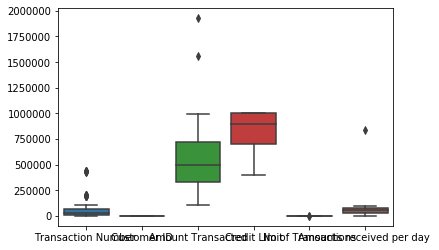

In [51]:
#Detecting and handling outliers
sns.boxplot(data = df)#outliers in the whole dataset
plt.show()

In [52]:
def find_outliers_IQR(df):

   Q1=df.quantile(0.25)

   Q3=df.quantile(0.75)

   IQR=Q3-Q1

   outliers = df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]

   return outliers

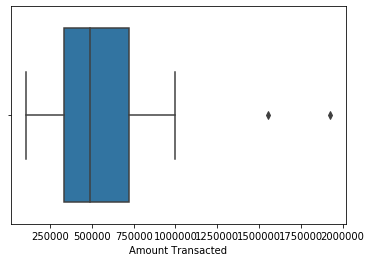

In [53]:
#Checking outliers under Amount_Transacted
sns.boxplot(data = df, x = "Amount Transacted")
plt.show()

In [54]:
outliers = find_outliers_IQR(df['Amount Transacted'])
outliers

4     1926072.0
97    1553907.0
Name: Amount Transacted, dtype: float64

In [55]:
print("number of outliers: "+ str(len(outliers)))

number of outliers: 2


In [56]:
#Dropping the outliers
df['Amount Transacted'].describe()

count    1.570000e+02
mean     5.425074e+05
std      2.714294e+05
min      1.056900e+05
25%      3.343960e+05
50%      4.915980e+05
75%      7.220480e+05
max      1.926072e+06
Name: Amount Transacted, dtype: float64

In [57]:
#Lower boundary
Q1_1 = df['Amount Transacted'].quantile(0.25) #
Q1_1

334396.0

In [58]:
#Upper boundary
Q3_1 = df['Amount Transacted'].quantile(0.75)
Q3_1

722048.0

In [59]:
#Calculating the interquartile range
IQR_1 = Q3_1 - Q1_1
IQR_1

387652.0

In [60]:
#Calculating the outlier cut-off
Lower_lim_1 = Q1_1 - 1.5 * IQR_1
Lower_lim_1

-247082.0

In [62]:
Upper_lim_1 = Q3_1 + 1.5 *IQR_1
Upper_lim_1

1303526.0

In [63]:
#Dropping the outliers

outliers_15_low_1 = df['Amount Transacted'] < Lower_lim_1
outliers_15_low_1

0      False
1      False
2      False
3      False
4      False
       ...  
152    False
153    False
154    False
155    False
156    False
Name: Amount Transacted, Length: 157, dtype: bool

In [64]:
outliers_15_up_1 = df['Amount Transacted'] > Upper_lim_1
outliers_15_up_1

0      False
1      False
2      False
3      False
4       True
       ...  
152    False
153    False
154    False
155    False
156    False
Name: Amount Transacted, Length: 157, dtype: bool

In [65]:
len(df['Amount Transacted']) - (len(df['Amount Transacted'][outliers_15_low_1]) + len(df['Amount Transacted'][outliers_15_up_1]))

155

In [66]:
df['Amount Transacted'][outliers_15_low_1 | outliers_15_up_1]

4     1926072.0
97    1553907.0
Name: Amount Transacted, dtype: float64

In [67]:
df['Amount Transacted'][~(outliers_15_low_1 | outliers_15_up_1)]

0      965721.0
1      413052.0
2      584822.0
3      980146.0
5      482394.0
         ...   
152    334683.0
153    454570.0
154    454519.0
155    358047.0
156    465281.0
Name: Amount Transacted, Length: 155, dtype: float64

In [69]:
df_1 = df[~(outliers_15_low_1 | outliers_15_up_1)]#new dataframe
df_1

,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
0,19,4.96,1/1/2019 0:12,grocery_pos,965721.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,2,82475,Platinum,Success
1,1009,4.96,1/1/2019 12:44,food_dining,413052.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,32555,Platinum,Success
2,2426,4.96,2/1/2019 0:25,gas_transport,584822.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,10173,Platinum,Success
3,2851,4.96,2/1/2019 12:01,misc_pos,980146.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,12342,Platinum,Success
5,4223,4.96,3/1/2019 15:19,shopping_net,482394.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,10003,Platinum,Success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,105392,2.13,2/3/2019 13:12,misc_pos,334683.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,2,80990,Signature,Success
153,106083,2.13,2/3/2019 18:13,shopping_net,454570.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,3,42831,Signature,Success
154,106493,2.13,2/3/2019 21:15,kids_pets,454519.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,1,27506,Signature,Success
155,106857,2.13,2/3/2019 23:59,kids_pets,358047.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,2,84565,Signature,Success


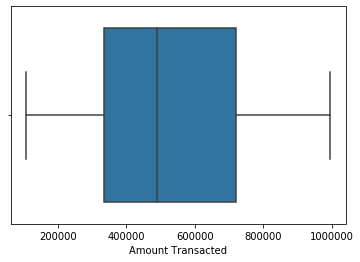

In [70]:
#box plot to check if the outliers are treated
sns.boxplot( x = df_1['Amount Transacted'])
plt.show()

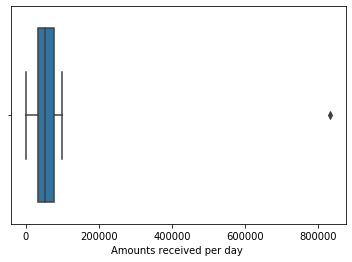

In [71]:
#checking column Amounts_received_per_day for outliers
sns.boxplot(data = df, x = "Amounts received per day ")
plt.show()

In [72]:
outliers = find_outliers_IQR(df['Amounts received per day '])
outliers

122    832630
Name: Amounts received per day , dtype: int64

In [73]:
print("number of outliers: "+ str(len(outliers)))

number of outliers: 1


In [74]:
#Handling the outliers
df_1["Amounts received per day "] 

0      82475
1      32555
2      10173
3      12342
5      10003
       ...  
152    80990
153    42831
154    27506
155    84565
156    30249
Name: Amounts received per day , Length: 155, dtype: int64

In [75]:
df_1['Amounts received per day '].describe()

count       155.000000
mean      59386.754839
std       68039.063366
min           0.000000
25%       32591.500000
50%       54049.000000
75%       77628.000000
max      832630.000000
Name: Amounts received per day , dtype: float64

In [76]:
#lower limits
Q1_2 = df_1['Amounts received per day '].quantile(0.25)
Q1_2

32591.5

In [77]:
#upper limits
Q3_2 = df_1['Amounts received per day '].quantile(0.75)
Q3_2

77628.0

In [78]:
#calculating interquartile range
IQR_2 = Q3_2 - Q1_2
IQR_2

45036.5

In [79]:
#Calculating the outlier cut-off
Lower_lim_2 = Q1_2 - 1.5 * IQR_2
Lower_lim_2

-34963.25

In [80]:
Upper_lim_2 = Q3_2 + 1.5 *IQR_2
Upper_lim_2

145182.75

In [81]:
# Dropping the outliers
outliers_15_low_2 = df_1['Amounts received per day '] < Lower_lim_2
outliers_15_low_2

0      False
1      False
2      False
3      False
5      False
       ...  
152    False
153    False
154    False
155    False
156    False
Name: Amounts received per day , Length: 155, dtype: bool

In [82]:
outliers_15_up_2 = df_1['Amounts received per day '] > Upper_lim_2
outliers_15_up_2

0      False
1      False
2      False
3      False
5      False
       ...  
152    False
153    False
154    False
155    False
156    False
Name: Amounts received per day , Length: 155, dtype: bool

In [83]:
len(df_1['Amounts received per day ']) - (len(df_1['Amounts received per day '][outliers_15_low_2]) + len(df_1['Amounts received per day '][outliers_15_up_2]))

154

In [84]:
df_1['Amounts received per day '][outliers_15_low_2 | outliers_15_up_2]

122    832630
Name: Amounts received per day , dtype: int64

In [85]:
df_1['Amounts received per day '][~(outliers_15_low_2 | outliers_15_up_2)]

0      82475
1      32555
2      10173
3      12342
5      10003
       ...  
152    80990
153    42831
154    27506
155    84565
156    30249
Name: Amounts received per day , Length: 154, dtype: int64

In [86]:
#new dataframe
df_2 = df_1[~(outliers_15_low_2 | outliers_15_up_2)]
df_2

,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
0,19,4.96,1/1/2019 0:12,grocery_pos,965721.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,2,82475,Platinum,Success
1,1009,4.96,1/1/2019 12:44,food_dining,413052.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,32555,Platinum,Success
2,2426,4.96,2/1/2019 0:25,gas_transport,584822.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,10173,Platinum,Success
3,2851,4.96,2/1/2019 12:01,misc_pos,980146.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,12342,Platinum,Success
5,4223,4.96,3/1/2019 15:19,shopping_net,482394.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,10003,Platinum,Success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,105392,2.13,2/3/2019 13:12,misc_pos,334683.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,2,80990,Signature,Success
153,106083,2.13,2/3/2019 18:13,shopping_net,454570.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,3,42831,Signature,Success
154,106493,2.13,2/3/2019 21:15,kids_pets,454519.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,1,27506,Signature,Success
155,106857,2.13,2/3/2019 23:59,kids_pets,358047.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,2,84565,Signature,Success


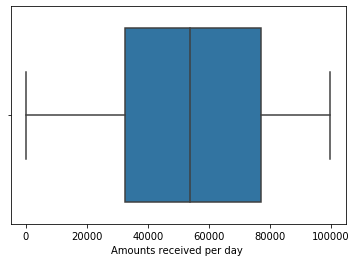

In [87]:
# Box plot for the new Amounts_received_per_day
sns.boxplot( x = df_2['Amounts received per day '])
plt.show()

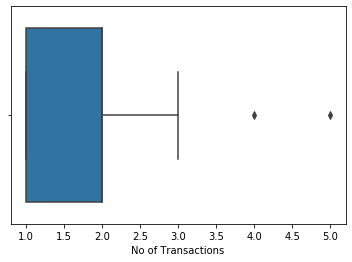

In [88]:
sns.boxplot(data = df, x = "No of Transactions")
plt.show()

In [89]:
outliers = find_outliers_IQR(df["No of Transactions"])
outliers

35    4
36    5
Name: No of Transactions, dtype: int64

In [90]:
print("number of outliers: "+ str(len(outliers)))

number of outliers: 2


In [91]:
df_2["No of Transactions"].describe

<bound method NDFrame.describe of 0      2
1      1
2      1
3      1
5      1
      ..
152    2
153    3
154    1
155    2
156    3
Name: No of Transactions, Length: 154, dtype: int64>

In [92]:
#Lower limit
Q1_3 = df_2["No of Transactions"].quantile(0.25)
Q1_3

1.0

In [93]:
#upper limit
Q3_3 = df_2["No of Transactions"].quantile(0.75)
Q3_3

2.0

In [94]:
#interquartile range
IQR_3 = Q3_3 - Q1_3
IQR_3

1.0

In [95]:
# Calculating the outlier cut-off
Lower_lim_3 = Q1_3 - 1.5 * IQR_3
Lower_lim_3

-0.5

In [96]:
Upper_lim_3 = Q3_3 + 1.5 *IQR_3
Upper_lim_3

3.5

In [97]:
outliers_15_low_3 = df_2['No of Transactions'] < Lower_lim_3
outliers_15_low_3

0      False
1      False
2      False
3      False
5      False
       ...  
152    False
153    False
154    False
155    False
156    False
Name: No of Transactions, Length: 154, dtype: bool

In [98]:
outliers_15_up_3 = df_2['No of Transactions'] > Upper_lim_3
outliers_15_up_3

0      False
1      False
2      False
3      False
5      False
       ...  
152    False
153    False
154    False
155    False
156    False
Name: No of Transactions, Length: 154, dtype: bool

In [99]:
len(df_2['No of Transactions']) - (len(df_2['No of Transactions'][outliers_15_low_3]) + len(df_2['No of Transactions'][outliers_15_up_3]))

152

In [100]:
df_2['No of Transactions'][outliers_15_low_3 | outliers_15_up_3]

35    4
36    5
Name: No of Transactions, dtype: int64

In [101]:
df_2['No of Transactions'][~(outliers_15_low_3 | outliers_15_up_3)]

0      2
1      1
2      1
3      1
5      1
      ..
152    2
153    3
154    1
155    2
156    3
Name: No of Transactions, Length: 152, dtype: int64

In [102]:
df_3 = df_2[~(outliers_15_low_3 | outliers_15_up_3)]
df_3

,Transaction Number,Customer ID,Time stamp,Category,Amount Transacted,First,Last,Gender,Street,City,Credit Limit,No of Transactions,Amounts received per day,Card Type,Authentication
0,19,4.96,1/1/2019 0:12,grocery_pos,965721.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,2,82475,Platinum,Success
1,1009,4.96,1/1/2019 12:44,food_dining,413052.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,32555,Platinum,Success
2,2426,4.96,2/1/2019 0:25,gas_transport,584822.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,10173,Platinum,Success
3,2851,4.96,2/1/2019 12:01,misc_pos,980146.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,12342,Platinum,Success
5,4223,4.96,3/1/2019 15:19,shopping_net,482394.0,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,1000000.0,1,10003,Platinum,Success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,105392,2.13,2/3/2019 13:12,misc_pos,334683.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,2,80990,Signature,Success
153,106083,2.13,2/3/2019 18:13,shopping_net,454570.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,3,42831,Signature,Success
154,106493,2.13,2/3/2019 21:15,kids_pets,454519.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,1,27506,Signature,Success
155,106857,2.13,2/3/2019 23:59,kids_pets,358047.0,Rebecca,Conley,F,181 Moreno Light Apt. 215,Tomahawk,500000.0,2,84565,Signature,Success


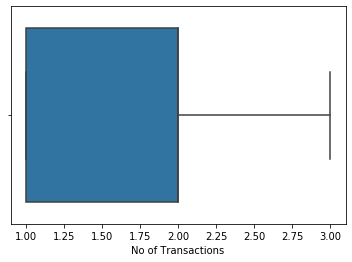

In [103]:
# Box plot without outliers
sns.boxplot( x = df_3['No of Transactions'])
plt.show()

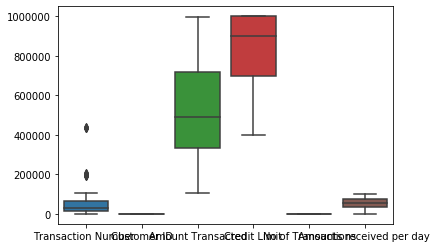

In [104]:
# Box plot for the whole dataset
sns.boxplot(data = df_3)
plt.show()

In [105]:
#Checking number of fraud cases
df_3['Is_fraud (Target Variable)'].value_counts()

KeyError: 'Is_fraud (Target Variable)'

In [131]:
#Feature Selection
#we will use a section of the data 
df_3.shape

(152, 15)

In [133]:
old_df.shape

(157, 15)

In [150]:
#From the dataframe, identify the number of legit and fraud trnsactions 
import math
Fraud = df_3[df_3['No of Transactions']==1]
Valid = df_3[df_3['No of Transactions']==0]
outlier_fraction = len(Fraud)/float(len(Valid))
 

ZeroDivisionError: float division by zero

In [153]:
print (outlier_fraction)
print ("Fraud cases : {}".format(len(Fraud)))
print ("Valid cases : {}".format(len(Valid)))

0
Fraud cases : 74
Valid cases : 0


In [110]:
#Filter Features by variance 
df_3.var()

Transaction Number           8.574790e+09
Customer ID                  2.317043e+00
Amount Transacted            5.591615e+10
Credit Limit                 4.161380e+10
No of Transactions           5.400837e-01
Amounts received per day     6.962763e+08
dtype: float64

In [111]:
#Filter features by corelation
import seaborn as sn
import matplotlib.pyplot as ply

<function matplotlib.pyplot.show(*args, **kw)>

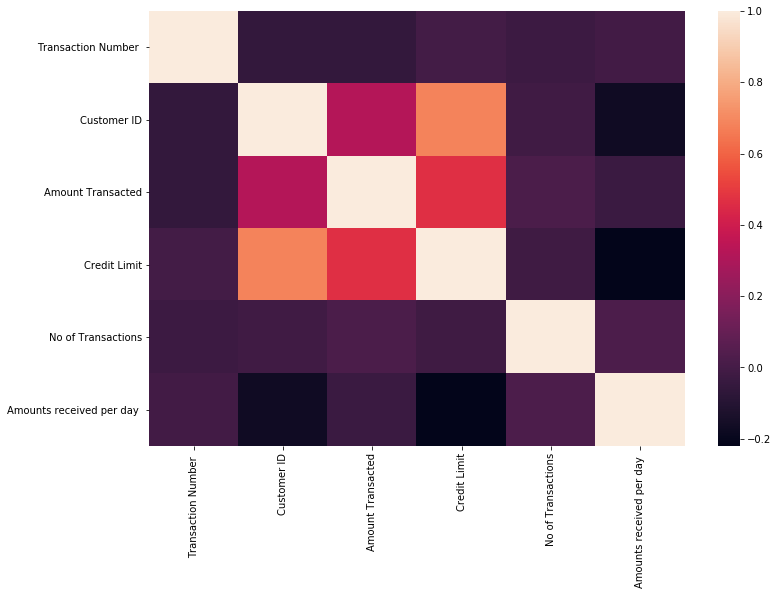

In [155]:
fig_dims = (12,8)
fig,ax = plt.subplots(figsize=fig_dims)
sn.heatmap(df_3.corr(), ax=ax)
plt.show

In [159]:
#create independent and dependent features
columns = df_3.columns.tolist()

In [161]:
#filter the column to remove data we do not want
columns = [c for c in columns if c not in ["Number of transactions"]]

In [172]:
#we then store the variable we are predicting
target= "Number of transactions"

In [174]:
#define a random state 
state = np.random.RandomState(42)
#define x
X = df_3[columns]


In [177]:
#define y
Y = df_3[target]

KeyError: 'Number of transactions'

In [ ]:
X_outliers = state.uniform (low=0, high=1, size=(X.shape[0], X.shape[1]))

In [176]:
#print the shapes of x and y
print(X.shape)
print(Y.shape)

(152, 15)


NameError: name 'Y' is not defined